In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import os
import pandas as pd

Cells_Data = pd.DataFrame(columns=["class", "filepath"])

for root, dirs, files in os.walk("archive"):
    if os.path.basename(root) == "CROPPED":
        class_name = os.path.basename(os.path.dirname(root))
        
        for file in files:
            if file.endswith(".bmp"):
                file_path = os.path.join(root, file)
                Cells_Data = pd.concat([Cells_Data, pd.DataFrame({
                    "class": [class_name],
                    "filepath": [file_path]
                })], ignore_index=True)

"Total de imagens .bmp:", len(Cells_Data)

('Total de imagens .bmp:', 4049)

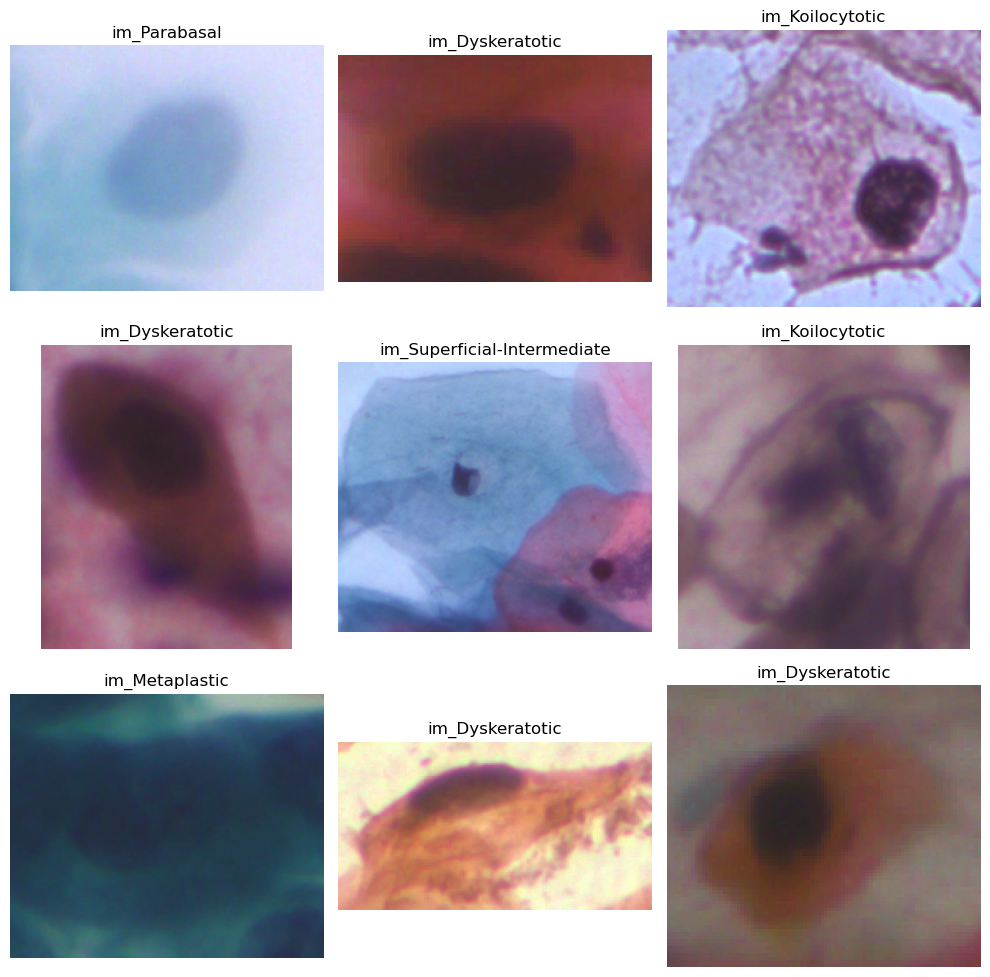

In [3]:
sample = Cells_Data.sample(9)  # pega 9 imagens aleatórias
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax, (_, row) in zip(axes.flatten(), sample.iterrows()):
    img = mpimg.imread(row["filepath"])
    ax.imshow(img, cmap="gray")
    ax.set_title(row["class"])
    ax.axis("off")

plt.tight_layout()
plt.show()

                                           img_array            class  \
0  [[[206, 197, 213], [209, 192, 216], [205, 194,...  im_Koilocytotic   
1  [[[147, 160, 177], [151, 152, 180], [146, 161,...  im_Koilocytotic   
2  [[[203, 197, 213], [207, 185, 218], [207, 185,...  im_Koilocytotic   
3  [[[167, 163, 189], [162, 152, 186], [156, 148,...  im_Koilocytotic   
4  [[[198, 192, 210], [198, 192, 210], [203, 192,...  im_Koilocytotic   

                                  predicted_mask_nuc  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                  predicted_mask_cyt  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   


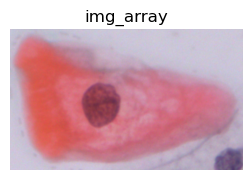


Tentando exibir uma imagem da coluna: class
❌ Coluna 'class' não parece conter imagens (tipo: <class 'str'>)

Tentando exibir uma imagem da coluna: predicted_mask_nuc


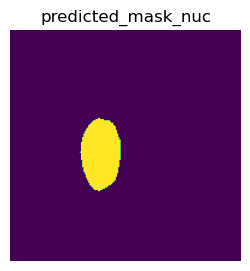


Tentando exibir uma imagem da coluna: predicted_mask_cyt


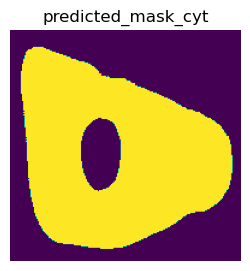


Tentando exibir uma imagem da coluna: predicted_mask_cell


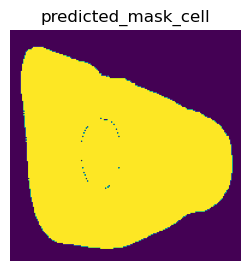


Tentando exibir uma imagem da coluna: cell_masked_image


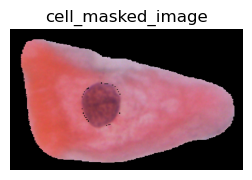

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

# Caminho do arquivo .pkl
caminho = "dataset_masks_modified.pkl"

# Carregar o dataset
df = pd.read_pickle(caminho)

# Configuração para mostrar todas as colunas no print
pd.set_option('display.max_columns', None)
print(df.head())

# Tentar exibir uma imagem de cada coluna
for col in df.columns:
    print(f"\nTentando exibir uma imagem da coluna: {col}")

    sample = df[col].iloc[0]

    try:
        # Caso a célula seja um caminho para arquivo
        if isinstance(sample, str) and sample.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = Image.open(sample)

        # Caso a célula seja um array numpy
        elif isinstance(sample, np.ndarray):
            img = Image.fromarray(sample.astype(np.uint8))

        # Caso a célula seja bytes (imagem em binário)
        elif isinstance(sample, (bytes, bytearray)):
            img = Image.open(io.BytesIO(sample))

        # Caso a célula seja uma lista (provavelmente lista de listas)
        elif isinstance(sample, list):
            arr = np.array(sample)
            if arr.ndim >= 2:
                img = Image.fromarray(arr.astype(np.uint8))
            else:
                raise ValueError("Lista não tem formato de imagem")

        else:
            print(f"❌ Coluna '{col}' não parece conter imagens (tipo: {type(sample)})")
            continue

        # Mostrar imagem
        plt.figure(figsize=(3, 3))
        plt.title(col)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"⚠️ Não foi possível exibir imagem da coluna '{col}': {e}")
